In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

In [ ]:

# Load the dataset from the CSV file
file_path = 'medicine.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Assume your dataset has 'Medicine' and 'Description' columns
X = df['Drug_Name']
y = df['Description']


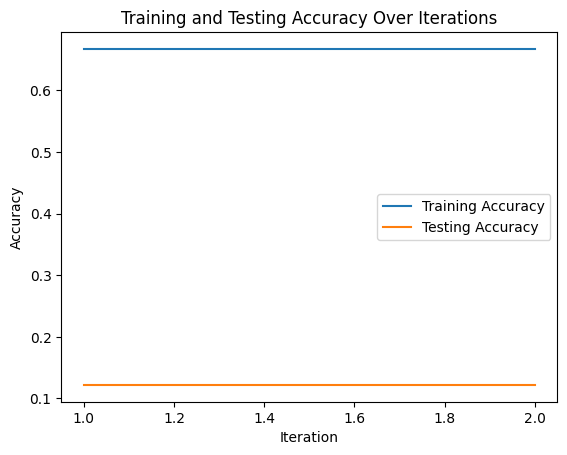

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with TfidfVectorizer and Support Vector Machine (SVM)
model = make_pipeline(TfidfVectorizer(), SVC())

# Lists to store training and testing accuracy for each iteration
training_accuracies = []
testing_accuracies = []

# Train the model and record accuracy for each iteration
for i in range(2):  # You can adjust the number of iterations
    model.fit(X_train, y_train)

    # Record training accuracy
    training_accuracy = model.score(X_train, y_train)
    training_accuracies.append(training_accuracy)

    # Record testing accuracy
    testing_accuracy = model.score(X_test, y_test)
    testing_accuracies.append(testing_accuracy)

# Plot the training and testing accuracy graph
iterations = range(1, len(training_accuracies) + 1)
plt.plot(iterations, training_accuracies, label='Training Accuracy')
plt.plot(iterations, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Over Iterations')
plt.legend()
plt.show()



In [ ]:
# Train the model
model.fit(X_train, y_train)

# Function to get medicine description
def get_medicine_description(medicine):
    # Predict the encoded label for the given medicine
    predicted_label = model.predict([medicine])[0]

    # Decode the predicted label to get the original description
    predicted_description = label_encoder.inverse_transform([predicted_label])[0]

    return f"Description for {medicine}:\n{predicted_description}"

# Function to train and test the model
def train_and_test_model():
    # Evaluate the model on the test set
    accuracy = model.score(X_test, y_test)
    return accuracy

In [ ]:
# Main function for user interaction
def main():
    print("Welcome to the Medicine Information System!")

    # Train and test the model
    accuracy = train_and_test_model()
    print(f"Model Accuracy on Test Set: {accuracy:.2%}")

    # Take user input for medicine or drug
    user_input = input("Please enter the name of the medicine or drug: ")

    # Get and display the medicine description
    medicine_description = get_medicine_description(user_input)
    print("\nMedicine Description:")
    print(medicine_description)

if __name__ == "__main__":
    main()


Welcome to the Medicine Information System!
Model Accuracy on Test Set: 12.19%
Please enter the name of the medicine or drug: Daclakem

Medicine Description:
Description for Daclakem:
lowerÂ chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)
